# ALEX-Net

In [1]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf

In [2]:
import tensorflow.keras.backend as K

In [3]:
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Input

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.layers import Flatten

In [8]:
from tensorflow.keras.layers import Conv2D

In [9]:
from tensorflow.keras.layers import MaxPooling2D

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
from tensorflow.keras.layers import LeakyReLU

In [12]:
from tensorflow.keras.layers import Activation

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

# Compile the model


In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 384)        

In [23]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [24]:
training_set=train_datagen.flow_from_directory('Data/Train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1011 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [25]:
img_dims = 150
epochs = 10
batch_size = 32

In [26]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/10
31/31 [==============================] - 70s 2s/step - loss: 0.7651 - accuracy: 0.4729 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 2/10
31/31 [==============================] - 72s 2s/step - loss: 0.6943 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 3/10
31/31 [==============================] - 73s 2s/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
31/31 [==============================] - 75s 2s/step - loss: 0.6949 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4965
Epoch 5/10
31/31 [==============================] - 74s 2s/step - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6934 - val_accuracy: 0.4931
Epoch 6/10
31/31 [==============================] - 74s 2s/step - loss: 0.6935 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5069
Epoch 7/10
31/31 [==============================] - 75s 2s/step - loss: 0.6931 - accuracy: 0.4944 - val_loss: 0.6932 - val_accuracy: 0.4965
Epoch 8/10
31/31 [==

In [27]:
import matplotlib.pyplot as plt

In [28]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'],'go--')
    plt.plot(history.history['val_accuracy'],'yo--')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'],'go--')
    plt.plot(history.history['val_loss'],'yo--')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.show()

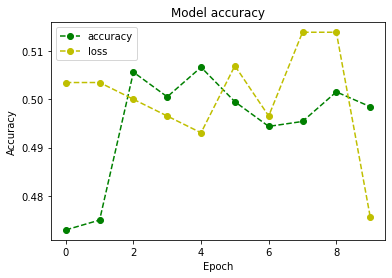

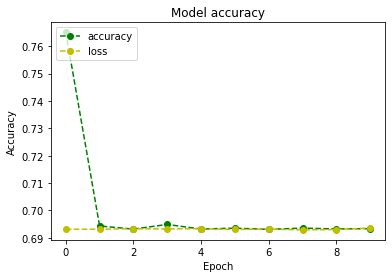

In [29]:
graph()

In [30]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
10/10 [==============================] - 4s 398ms/step - loss: 0.6933 - accuracy: 0.4935
Test Accuracy: 49.35064911842346
